In [1]:
import tensorflow as tf
import numpy as np
import os

In [3]:
# Load your cleaned text
with open("../data/cleaned_poems_lines.txt", "r", encoding="utf-8") as f:
    text = f.read()

print(f"Text length: {len(text)} characters")


Text length: 40998 characters


In [4]:
# Create character-to-index mapping
chars = sorted(set(text))
char2idx = {u: i for i, u in enumerate(chars)}
idx2char = np.array(chars)
vocab_size = len(chars)

print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 241


In [6]:
# see the first 20 characters
print(f"First 20 characters: {chars[:20]}")

First 20 characters: ['\n', ' ', 'ሀ', 'ሁ', 'ሂ', 'ሃ', 'ሄ', 'ህ', 'ሆ', 'ለ', 'ሉ', 'ሊ', 'ላ', 'ሌ', 'ል', 'ሎ', 'ሏ', 'ሐ', 'ሓ', 'ሔ']


In [8]:
# Convert text to integer sequence
text_as_int = np.array([char2idx[c] for c in text])
text_as_int[:20]  # Show the first 20 integers

array([ 22, 143, 100, 182,  82,   1,  72,   9,  69,  82,   1,  69,  80,
        98,  56,   1,  20,  11,  98,   0])

In [ ]:
# Create training sequences
seq_length = 60
examples_per_epoch = len(text) // seq_length

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)



In [10]:
def split_input_target(chunk):
    input_seq = chunk[:-1]
    target_seq = chunk[1:]
    return input_seq, target_seq

In [11]:
dataset = sequences.map(split_input_target)

In [12]:
# Batch and shuffle
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [14]:
# build the model
embedding_dim = 128
rnn_units = 256

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(None,), batch_size=BATCH_SIZE),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
])

model.summary()

C:\Users\windows 11\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (64, None, 128)        │        30,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (64, None, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, None, 241)        │        61,937 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 487,025 (1.86 MB)

 Trainable params: 487,025 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Define loss
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

In [16]:
# Train the model
EPOCHS = 30

history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - loss: 5.2849
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - loss: 4.2108
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - loss: 4.1069
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - loss: 4.0338
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - loss: 3.9386
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - loss: 3.8225
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - loss: 3.7485
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - loss: 3.7086
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - loss: 3.6798
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - loss: 3.6418
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - loss: 3.6261
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - loss: 3.5992
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - loss: 3.5830
Epoch 14/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 344ms/step - loss: 3.5696
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 348ms/step - lo

In [18]:
model.save('amharic_poet_lstm.h5')

In [24]:
import pickle

# Load your training text again
with open("../data/cleaned_poems_lines.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Create vocabulary
vocab = sorted(set(text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = {i: u for i, u in enumerate(vocab)}

# Save to .pkl files
with open("char2idx.pkl", "wb") as f:
    pickle.dump(char2idx, f)

with open("idx2char.pkl", "wb") as f:
    pickle.dump(idx2char, f)

print("✅ Saved char2idx.pkl and idx2char.pkl")


✅ Saved char2idx.pkl and idx2char.pkl


In [27]:
# --- Load vocab mappings ---
with open("char2idx.pkl", "rb") as f:
    char2idx = pickle.load(f)

with open("idx2char.pkl", "rb") as f:
    idx2char = pickle.load(f)

vocab_size = len(char2idx)
embedding_dim = 128
rnn_units = 256

# --- Rebuild the model with batch_size=1 for generation ---
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(None,), batch_size=1),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True),
    tf.keras.layers.Dense(vocab_size)
])

# --- Load trained weights ---
model.load_weights("amharic_poet_lstm.h5")
model.build(tf.TensorShape([1, None]))

# --- Find the LSTM layer to reset its state ---
lstm_layer = None
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.LSTM):
        lstm_layer = layer
        break

# --- Generate text function ---
def generate_text(model, start_string, gen_length=300, temperature=1.0):
    input_eval = [char2idx[s] for s in start_string if s in char2idx]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []

    if lstm_layer:
        lstm_layer.reset_states()

    for _ in range(gen_length):
        predictions = model(input_eval)
        predictions = predictions[:, -1, :] / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[0, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# --- Run generation ---
print(generate_text(model, start_string="እኔስ በውዳሴሽ ባሕር እዋኛለሁ", gen_length=300, temperature=0.8))


እኔስ በውዳሴሽ ባሕር እዋኛለሁ ሃን እያል ሲብራ
ጠዚአብሔር ቃ ዛት
እንደ ነት ተንደጣ ማንቡ ከለታው
ስታመለ በሊሰብ መስሩቱ
የአጠቤፍ የክዕው አለውላለም
የመክር አብለቀለ በላይ በረሽ
ዘንግን ወደድን መናት
ያለም ሲያዋርተገል
አድርምህ የዘዘ በት
ጌታስ ኢትናን አምላ ያደሃነት
በደርን በለ ለመወነው  አንቱም የመሳስ
አንቺም አጠር አምድቱ ኤልቶ ጨብል በቀባት መኖዱስነው
የቀለገር ለባችን በአንዲያባት ተየእልቤት በጅ ልገና
እንደ እኔ ሀለው የተሰገፍቱ
ረመትስ በጣን እግዚሱ አለም አወከስበው
በሰውራካ አን ከ


In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Load the dataset
data = open('../data/cleaned_poems_lines.txt',  encoding="utf-8").read()

# Lowercase and split the text
corpus = data.split("\n")

# Preview the result
print(corpus)
print(len(corpus))

['መዘንጋት ባለበት በታናሽ ሕሊና', 'መዘመር ልጀምር ለድንግል ምስጋና', 'እኔስ በውዳሴሽ ባሕር እዋኛለሁ', 'ገናንነትሽን ክብርሽን እያሰብኩ', 'የትህትናሽ ነገር ቢወሳ አያልቅም', 'ታነቢያለሽና ለዚህ ክፉ አለም', 'ድንግል ሆይ ለኃጥአን ታስቢያለሽና', 'ልቦናዬ ባንቺ በምልጃሽ ተፅናና', 'ማርያም ሆይ ስለዚህ እንወድሻለን', 'አንቺን ተማፅነናል እንድታማልጂን', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ስለበደለኞች ሊያቀርቡ ልመና', 'እሳትአውያኑ ሱራፌል ኪሩቤል', 'ሊነኩት ያልቻሉት የእሳቱን ነበልባል', 'አንቺ ግን ታቀፍሽው ሳምሽው በከንፈርሽ', 'ከፍጥረት ለይቶ ፍፁም ስላፀናሽ', 'ማርያም ሆይ ስለዚህ እንወድሻለን', 'አንቺን ተማፅነናል', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ስለበደለኞች ሊያቀርቡ ልመና', 'መድኃኔዓለም የለም የሚሳነው', 'አማኑኤል የለም የሚሳነው', 'እርሱ ቃል ሲናገር ተራራው ሜዳ ነው', 'መድኃኔዓለም የለም የሚሳነው', 'አላስብም አልፈዋለሁ ብዬ', 'ጉንጭ አልፎ ትራሴን እያጠበ እንባዬን', 'እየተፈጸመ ኃይሉ በድካሜ', 'ማእበሉን አለፍኩኝ ቀለለልኝ ሸክሜ', 'የቤቴ እራስ ነው የእቅዴ መሪ', 'በክፉም በደጉም ነፍሴን አስተማሪ', 'ፈጥሮ የማይረሳኝ ቤዛዬ ደረሰ', 'ቤቴን ደስታ ሞላው እንባዬ ታበሰ', 'ትናንት ባዶ ነበር የለኝ የሚሰፈር', 'አንዳች አልነበረኝ የሚታይ የሚቆጠር', 'ከርሱ የተነሳ ዛሬ ግን ሙሉ ነኝ', 'ክብር ለእርሱ ይሁን አለ የማይተወኝ', 'እየከለከለ ለእኔ ማይጠቅመኝን', 'በጊዜ እየሰጠ ደግሞ የሚረባኝን', 'ሁሉ በእርሱ ሆኗል አልሆነም ያለ እርሱ', 'ውዳሴ ምስጋና ይድረስ ለንጉሱ', 'እግዚአብሔርን አመስግኑት', 'ሥራህ ግሩም ድንቅ ነው በሉት', 'ሰማይን ያለምሰሶ', 'ምድርንም ያለ መሠረት', 'ያጸና

In [31]:
# Initialize the vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization()

# Build the vocabulary
vectorize_layer.adapt(corpus)

In [32]:
# Get the vocabulary and its size
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f'{vocabulary}')
print(f'{vocab_size}')

['', '[UNK]', 'ነው', 'ላይ', 'ወደ', 'እንደ', 'ሁሉ', 'አምላክ', 'ጌታ', 'ግን', 'ብሎ', 'እኔ', 'ሆይ', 'ሰው', 'አንድ', 'ስለ', 'አለ', 'ድንግል', 'እግዚአብሔር', 'ምን', 'ደስ', 'ዛሬ', 'ስቡህ', 'ልጅ', 'ሁሉን', 'ፍቅር', 'ጊዜ', 'ይኸው', 'እያለ', 'ነገር', 'ቃል', 'ክርስቶስ', 'አንተ', 'ይቅር', 'ዘመን', 'ዓመት', 'ክብር', 'ከቶ', 'ኢየሱስ', 'አባት', 'በመስቀል', 'መቼ', 'ሁሉም', 'ጋር', 'ዲያብሎስ', 'ዮናስ', 'አዳም', 'ምስጉን', 'መጣ', 'መች', 'ያለ', 'ዝም', 'እኛ', 'እስከ', 'እርሱ', 'አምስቱ', 'ቤት', 'በጣም', 'ማነው', 'መስቀል', 'ለምን', 'ሆኖ', 'የሰው', 'እንኳን', 'እባክህ', 'አለኝ', 'ሰዓት', 'ሥም', 'ድረስ', 'ዛሬም', 'እውነት', 'እንዴት', 'እሱ', 'ነበር', 'ተስፋ', 'ብዙ', 'ብቻ', 'ስትመጪ', 'ሞት', 'ፍሬ', 'ድንቅ', 'ይሁን', 'ያለው', 'እያሉ', 'እኮ', 'እኛን', 'ኤሎሄ', 'አቤት', 'አቤቱ', 'አለው', 'አሁን', 'ናት', 'ነኝ', 'ነበረ', 'ነህ', 'ቀን', 'ዳግም', 'የለም', 'ኢየሱስን', 'አድርጎ', 'አደረሰሽ', 'አንደበት', 'ተወለደ', 'በደል', 'በዚህ', 'በአንድ', 'በር', 'ቅዱስ', 'ስለሆነ', 'ሰዎች', 'ማን', 'ልጆች', 'ፍጥረት', 'ጠላት', 'ጌታችን', 'ጋራ', 'ዳዊት', 'ደግሞ', 'ደም', 'ይህንን', 'ይህን', 'የአይሁድ', 'ዕጣ', 'ዓለም', 'ክፉ', 'እግዚአብሔርን', 'እኔን', 'እራሱን', 'አድርገን', 'አክሊል', 'አምላክን', 'አምላኬ', 'አልፎ', 'አለም', 'ንጉስ', 'ንጉሥ', 'ነቢዩ', 'ኃጢአት', 'ብዛት', 'በዕውነት', 'በራሱ', 'በምድር',

In [33]:
# Initialize the sequences list
input_sequences = []

for line in corpus:
    # Generate the integer sequence of the current line
	sequence = vectorize_layer(line).numpy()

    # Loop over the line several times to generate the subphrases
	for i in range(1, len(sequence)):
        # Generate the subphrase
		n_gram_sequence = sequence[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)


# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [35]:
# Get sample sentence
sentence = corpus[20].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(vocabulary.index(word))

# Print the token list
print(token_list)

sample sentence: ['መድኃኔዓለም', 'የለም', 'የሚሳነው']
[1029, 97, 345]


In [36]:
def sequence_to_text(sequence, vocabulary):
  '''utility to convert integer sequence back to text'''

  # Loop through the integer sequence and look up the word from the vocabulary
  words = [vocabulary[index] for index in sequence]

  # Combine the words into one sentence
  text = tf.strings.reduce_join(words, separator=' ').numpy().decode()

  return text

In [37]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0 4887 5077 5220]
decoded to text:       መዘመር ልጀምር ለድንግል
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 191


In [38]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0 4887 5077]
decoded to text:        መዘመር ልጀምር
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 5220


In [39]:
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Put the inputs and labels to a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((xs,ys))

# Optimize the dataset for training
dataset = dataset.cache().prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE)

In [40]:
# Parameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

# Build the model
model = tf.keras.models.Sequential([
            tf.keras.Input(shape=(max_sequence_len-1,)),
            tf.keras.layers.Embedding(vocab_size, embedding_dim),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units)),
            tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 9, 100)         │       540,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 300)            │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5404)           │     1,626,604 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,468,204 (9.42 MB)

 Trainable params: 2,468,204 (9.42 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
epochs = 100

# Train the model
history = model.fit(dataset, epochs=epochs)

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.0092 - loss: 8.6093
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.0150 - loss: 6.7303
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.0162 - loss: 6.7480
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.0207 - loss: 7.0135
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.0228 - loss: 6.8304
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.0965 - loss: 5.2366
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.1928 - loss: 4.1712
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.3568 - loss: 3.0529
Epoch 9/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.5447 - loss: 2.0619
Epoch 10/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.6646 - loss: 1.4599
Epoch 11/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.7330 - loss: 1.1142
Epoch 12/100
196/19

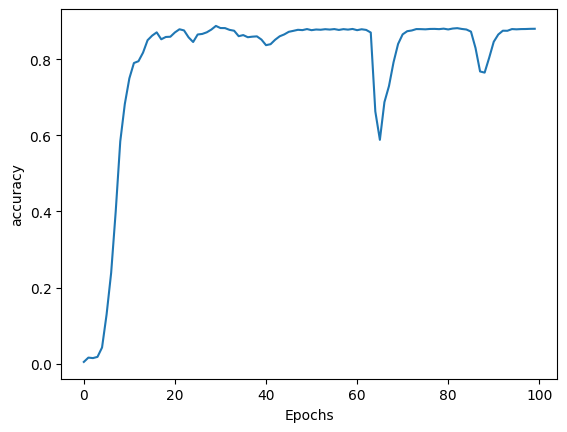

In [42]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [44]:
# Define seed text
seed_text = "መዘመር ልጀምር ለድንግል"

# Define total words to predict
next_words = 50

# Loop until desired length is reached
for _ in range(next_words):

	# Generate the integer sequence of the current line
	sequence = vectorize_layer(seed_text)

	# Pad the sequence
	sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(sequence, verbose=0)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:

		# Look up the word associated with the index.
		output_word = vocabulary[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result
print(seed_text)

መዘመር ልጀምር ለድንግል ምስጋና እኮ ሲባል ነው አልይዝም ፍሬ ስለሌለኝ ሕይወቱ ብሎ አፋጠጠችው ሀገር ቸሩ ድሕረት ገብቶት ድረስ አብረው እንኳን ናት ግባበት ሲደርስበት ሞቀ ውለታ የሞትከው አሉ አለበሰኝ ስታልፍ ምግብ ናት ጥፊ ማዶም ሆነን ሁሉን ነገር ሥራበት የለንም ብሆንም አደራ አገናኘው የለንም ብሎ ተነዳ ገብ እመቤት ናት በሕይወታችን ዓይነት እርካታ ወሬ ተቀብሎ አልልህም
